This code was generated by Watson Studio Neural Network Modeler. It uses Keras and TensorFlow and trains the neural network for the prediction of MNIST hand-written images

Make sure that you have installed all python libraries as described in the import section of the script. 

You need also to download the pickled data sets for training, validation and test.

Upon training, the model will be saved as keras_model.hdf5. On my laptop one epoch takes around 2 minutes. To get satisfactory accuracy, two or three training epochs are sufficient.

In [74]:
'''
    IBM Deep Learning (IDE) Generated Code.
    Compatible Keras Version : 2.1
    Tested on Python Version : 3.6.3
'''

# Choose the underlying compiler - tensorflow or theano
import json
import os 

with open(os.path.expanduser('~') + "/.keras/keras.json","r") as f:
    compiler_data = json.load(f)
compiler_data["backend"] = "tensorflow"
compiler_data["image_data_format"] = "channels_last"  
with open(os.path.expanduser('~') + '/.keras/keras.json', 'w') as outfile:
    json.dump(compiler_data, outfile)

# Global variable intilization
defined_metrics = []
defined_loss = ""

# import all the required packages
import numpy as np

import keras
from keras.models import Model
import keras.backend as K
import keras.regularizers as R
import keras.constraints as C
from keras.layers import Activation, AveragePooling2D, BatchNormalization, Convolution2D, Dense, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, Input, MaxPooling2D
from keras.optimizers import Adam

# Load data from pickle object

import pickle
class_labels_count = 1
with open('mnist-tf-train.pkl', 'rb') as f:
    (train_data, train_label) = pickle.load(f)

    if (len(train_data.shape) == 3): 
        if('tensorflow' == 'tensorflow'):
            train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1).astype('float32') / 255   
        else:
            train_data = train_data.reshape(train_data.shape[0], 1, train_data.shape[1], train_data.shape[2]).astype('float32') / 255   
    if (len(train_label.shape) == 1) or (len(train_label.shape) == 2 and train_label.shape[1] == 1):
        from keras.utils import np_utils
        class_labels_count = len(set(train_label.flatten()))
        train_label = np_utils.to_categorical(train_label, class_labels_count)
    else:
        class_labels_count = train_label.shape[1]

val_data = []
if('mnist-tf-valid.pkl'):
    with open('mnist-tf-valid.pkl', 'rb') as f:
        (val_data, val_label) = pickle.load(f)
        if (len(val_data.shape) == 3):
            if('tensorflow' == 'tensorflow'):
                val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], val_data.shape[2], 1).astype('float32') / 255
            else:
                val_data = val_data.reshape(val_data.shape[0], 1, val_data.shape[1], val_data.shape[2]).astype('float32') / 255
        if (len(val_label.shape) == 1) or (len(val_label.shape) == 2 and val_label.shape[1] == 1):
            from keras.utils import np_utils
            val_label = np_utils.to_categorical(val_label, class_labels_count)
else:
    print('Validation set details not provided')
  
test_data = []
if('mnist-tf-test.pkl'):
    with open('mnist-tf-test.pkl', 'rb') as f:
        (test_data, test_label) = pickle.load(f)
        if (len(test_data.shape) == 3): 
            if('tensorflow' == 'tensorflow'):
                test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[2], 1).astype('float32') / 255
            else:
                test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[2]).astype('float32') / 255
        if (len(test_label.shape) == 1) or (len(test_label.shape) == 2 and test_label.shape[1] == 1):
            from keras.utils import np_utils
            test_label = np_utils.to_categorical(test_label, class_labels_count)
else:
    print('Test set details not provided')

print(train_data.shape)
batch_input_shape_ImageData_aa612462 = train_data.shape[1:]
train_batch_size = 64

if True:

    #Input Layer
    ImageData_aa612462 = Input(shape=batch_input_shape_ImageData_aa612462)
    #Convolution2D Layer
    Convolution2D_1 = Convolution2D(32, (3, 3), kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', padding = 'valid', strides = (1, 1), data_format = 'channels_last', use_bias = False, name = 'Convolution2D_4991a3b7')(ImageData_aa612462)
    #Batch Normalization Layer
    Convolution2D_1 = BatchNormalization(axis=3,name='bn_Convolution2D_4991a3b7')(Convolution2D_1)
    #Rectification Linear Unit (ReLU) Activation Layer
    ReLU_2 = Activation('relu', name = 'ReLU_ad8b7ea2')(Convolution2D_1)
    #Pooling2D Layer
    Pooling2D_3 = MaxPooling2D(pool_size = (2, 2), padding = 'valid', data_format = 'channels_last', strides = (2, 2), name = 'Pooling2D_96e67797')(ReLU_2)
    #Convolution2D Layer
    Convolution2D_4 = Convolution2D(64, (3, 3), kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', padding = 'valid', strides = (1, 1), data_format = 'channels_last', use_bias = False, name = 'Convolution2D_23a10a4b')(Pooling2D_3)
    #Batch Normalization Layer
    Convolution2D_4 = BatchNormalization(axis=3,name='bn_Convolution2D_23a10a4b')(Convolution2D_4)
    #Rectification Linear Unit (ReLU) Activation Layer
    ReLU_5 = Activation('relu', name = 'ReLU_a3561d80')(Convolution2D_4)
    #Pooling2D Layer
    Pooling2D_6 = MaxPooling2D(pool_size = (2, 2), padding = 'valid', data_format = 'channels_last', strides = (2, 2), name = 'Pooling2D_302b0c45')(ReLU_5)
    #Convolution2D Layer
    Convolution2D_7 = Convolution2D(64, (3, 3), kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', padding = 'valid', strides = (1, 1), data_format = 'channels_last', use_bias = False, name = 'Convolution2D_9080ad6c')(Pooling2D_6)
    #Batch Normalization Layer
    Convolution2D_7 = BatchNormalization(axis=3,name='bn_Convolution2D_9080ad6c')(Convolution2D_7)
    #Rectification Linear Unit (ReLU) Activation Layer
    ReLU_8 = Activation('relu', name = 'ReLU_aac1d5a9')(Convolution2D_7)
    #Pooling2D Layer
    Pooling2D_9 = MaxPooling2D(pool_size = (2, 2), padding = 'valid', data_format = 'channels_last', strides = (2, 2), name = 'Pooling2D_53f9ddb1')(ReLU_8)
    #Flatten Layer
    Flatten_10 = Flatten(name = 'Flatten_bd06de64')(Pooling2D_9)
    #Dense or Fully Connected (FC) Layer
    Dense_11 = Dense(10, kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', use_bias = False, name = 'Dense_d2ec2247')(Flatten_10)
    #Softmax Activation Layer
    Softmax_12 = Activation('softmax', name = 'Softmax_3df1783a')(Dense_11)
    #Accuracy Metric
    defined_metrics = ['accuracy']
    #SigmoidCrossEntropy Loss
    defined_loss = 'categorical_crossentropy'

    # Define a keras model
    model_inputs = [ImageData_aa612462]
    model_outputs = [Softmax_12]
    model = Model(inputs=model_inputs, outputs=model_outputs)

    # Set the required hyperparameters    
    num_epochs = 1

    # Defining the optimizer function
    adam_learning_rate = 0.1
    adam_decay = 0.1
    adam_beta_1 = 0.9
    adam_beta_2 = 0.999
    optimizer_fn = Adam(lr=adam_learning_rate, beta_1=adam_beta_1, beta_2=adam_beta_2, decay=adam_decay)

    # performing final checks
    if not defined_metrics:
        defined_metrics=None
    if not defined_loss:
        defined_loss = 'categorical_crossentropy'
    if "ImageData" == "TextData" and "" == "Lang_Model":
        # adding a final Dense layer which has (vocab_length+1) units
        layers = [l for l in model.layers]
        for i in range(len(layers)):
            if isinstance(layers[i], keras.layers.core.Dense) and isinstance(layers[i+1], keras.layers.core.Activation):
                d = Dense(vocab_length+1, name = 'Dense_for_LM_' + str(i+1))(layers[i].output)
                layers[i+1].inbound_nodes = []              # assumption: there are no merges here
                d = layers[i+1](d)
        model = Model(inputs=layers[0].input, outputs=layers[len(layers)-1].output)
    
    # Compile and train the model
    model.compile(loss=defined_loss, optimizer=optimizer_fn, metrics=defined_metrics)
    
    if len(model_outputs) > 1: 
        train_label = [train_label] * len(model_outputs)
        if len(val_data) > 0: val_label = [val_label] * len(model_outputs)
        if len(test_data) > 0: test_label = [test_label] * len(model_outputs)
    
    # validate the model
    if (len(val_data) > 0):
        model.fit(train_data, train_label, batch_size=train_batch_size, epochs=num_epochs, verbose=1, validation_data=(val_data, val_label), shuffle=True)
    else:
        model.fit(train_data, train_label, batch_size=train_batch_size, epochs=num_epochs, verbose=1, shuffle=True)

    # test the model
    if (len(test_data) > 0):
        test_scores = model.evaluate(test_data, test_label, verbose=1)
        print(test_scores)

    # saving the model
    print('Saving the model...')
    if 'model_result_path' not in locals() and 'model_result_path' not in globals():
        model_result_path = "./keras_model.hdf5"
    model.save(model_result_path)
    print("Model saved in file: %s" % model_result_path)



(50040, 28, 28, 1)
Train on 50040 samples, validate on 9960 samples
Epoch 1/1
10000/10000 [==============================] - 8s 805us/step
[0.1247664920926094, 0.9639]
Saving the model...
Model saved in file: ./keras_model.hdf5


In [4]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Convolution2D_4991a3b7 (Conv (None, 26, 26, 32)        288       
_________________________________________________________________
bn_Convolution2D_4991a3b7 (B (None, 26, 26, 32)        128       
_________________________________________________________________
ReLU_ad8b7ea2 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
Pooling2D_96e67797 (MaxPooli (None, 13, 13, 32)        0         
_________________________________________________________________
Convolution2D_23a10a4b (Conv (None, 11, 11, 64)        18432     
_________________________________________________________________
bn_Convolution2D_23a10a4b (B (None, 11, 11, 64)        256       
__________

Here I'm using the previously saved model for the predictions. You will see "./keras_model_3ep.hdf5", but you can replace it with the model that has just been saved by the previous cells (./keras_model.hdf5)

I'm preprocessing the image in sense to load it as grayscale, add the contrast, resize it to the MNIST-compatible size, normalize it and reshape to correspond to the model. 

The prediction is given as array of 10 probabilities, and the response will be based on the highest of all values.

I have uploaded some examples of digits, the prediction is quite good, but not perfect. I can see it is wrong for number 7 with dash, and for the digits that are written with very thin lines. But this is the problem of the data set, which doesn't include a lot of such examples.

Please change the name of the image file and test it yourself.

prediction is  [9.8956364e-01 1.1839402e-06 4.3682227e-04 2.8984472e-05 2.9607034e-05
 9.1047041e-05 6.0896204e-05 1.9190690e-04 4.2568150e-04 9.1702798e-03]
This digit is: 0 with 98.95636439323425% confidence.


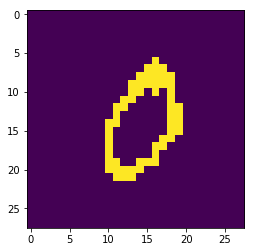

In [78]:
import cv2
import matplotlib.pyplot as plt

model.load_weights('./keras_model_3ep.hdf5')

imgfile = "number0.jpg"

image = cv2.imread(imgfile,0)
retval, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.resize(((image-255)/255), (28, 28)))

image = np.array(cv2.resize((255-image)/255, (28, 28)).reshape((1, 28, 28, 1)))
prediction = model.predict(image)[0]
print("prediction is ",prediction)

predictednumber = ''
maxprob = -1
for n in [0,1,2,3,4,5,6,7,8,9]:
	if (prediction[n] > maxprob):
		predictednumber = str(n)
		maxprob = prediction[n]
print('This digit is: ' + predictednumber + ' with ' + str(maxprob * 100) + '% confidence.')

In this cell below, I'm importing all necessary libraries and recreating the model, this time not to train it, but just to be able to use it for the predictions. All the rest is the same. 

This means that if you don't want to train the model yourself, you can just use this section to test with different images.

prediction is  [9.1495043e-01 3.0186842e-04 2.0478204e-02 2.6922538e-03 2.6453764e-04
 1.6777651e-02 2.1572770e-03 1.9313190e-02 4.8973998e-03 1.8167138e-02]
This digit is: 0 with 91.4950430393219% confidence.


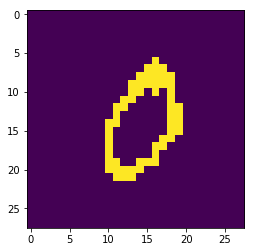

In [79]:
import numpy as np
import keras
from keras.models import Model
import keras.backend as K
import keras.regularizers as R
import keras.constraints as C
from keras.layers import Activation, AveragePooling2D, BatchNormalization, Convolution2D, Dense, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, Input, MaxPooling2D
import cv2
import matplotlib.pyplot as plt


ImageData_aa612462 = Input(shape=(28,28,1))
#Convolution2D Layer
Convolution2D_1 = Convolution2D(32, (3, 3), kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', padding = 'valid', strides = (1, 1), data_format = 'channels_last', use_bias = False, name = 'Convolution2D_4991a3b7')(ImageData_aa612462)
#Batch Normalization Layer
Convolution2D_1 = BatchNormalization(axis=3,name='bn_Convolution2D_4991a3b7')(Convolution2D_1)
#Rectification Linear Unit (ReLU) Activation Layer
ReLU_2 = Activation('relu', name = 'ReLU_ad8b7ea2')(Convolution2D_1)
#Pooling2D Layer
Pooling2D_3 = MaxPooling2D(pool_size = (2, 2), padding = 'valid', data_format = 'channels_last', strides = (2, 2), name = 'Pooling2D_96e67797')(ReLU_2)
#Convolution2D Layer
Convolution2D_4 = Convolution2D(64, (3, 3), kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', padding = 'valid', strides = (1, 1), data_format = 'channels_last', use_bias = False, name = 'Convolution2D_23a10a4b')(Pooling2D_3)
#Batch Normalization Layer
Convolution2D_4 = BatchNormalization(axis=3,name='bn_Convolution2D_23a10a4b')(Convolution2D_4)
#Rectification Linear Unit (ReLU) Activation Layer
ReLU_5 = Activation('relu', name = 'ReLU_a3561d80')(Convolution2D_4)
#Pooling2D Layer
Pooling2D_6 = MaxPooling2D(pool_size = (2, 2), padding = 'valid', data_format = 'channels_last', strides = (2, 2), name = 'Pooling2D_302b0c45')(ReLU_5)
#Convolution2D Layer
Convolution2D_7 = Convolution2D(64, (3, 3), kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', padding = 'valid', strides = (1, 1), data_format = 'channels_last', use_bias = False, name = 'Convolution2D_9080ad6c')(Pooling2D_6)
#Batch Normalization Layer
Convolution2D_7 = BatchNormalization(axis=3,name='bn_Convolution2D_9080ad6c')(Convolution2D_7)
#Rectification Linear Unit (ReLU) Activation Layer
ReLU_8 = Activation('relu', name = 'ReLU_aac1d5a9')(Convolution2D_7)
#Pooling2D Layer
Pooling2D_9 = MaxPooling2D(pool_size = (2, 2), padding = 'valid', data_format = 'channels_last', strides = (2, 2), name = 'Pooling2D_53f9ddb1')(ReLU_8)
#Flatten Layer
Flatten_10 = Flatten(name = 'Flatten_bd06de64')(Pooling2D_9)
#Dense or Fully Connected (FC) Layer
Dense_11 = Dense(10, kernel_initializer = 'glorot_normal', bias_initializer = 'glorot_normal', use_bias = False, name = 'Dense_d2ec2247')(Flatten_10)
#Softmax Activation Layer
Softmax_12 = Activation('softmax', name = 'Softmax_3df1783a')(Dense_11)
#Accuracy Metric
defined_metrics = ['accuracy']
#SigmoidCrossEntropy Loss
defined_loss = 'categorical_crossentropy'

# Define a keras model
model_inputs = [ImageData_aa612462]
model_outputs = [Softmax_12]
model = Model(inputs=model_inputs, outputs=model_outputs)
    
model.load_weights('./keras_model.hdf5')

imgfile = "number0.jpg"

# cv2.imread(imgfile,0) this "0" means that the image will be loaded as grayscale

image = cv2.imread(imgfile,0)
retval, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.resize(((image-255)/255), (28, 28)))

image = np.array(cv2.resize((255-image)/255, (28, 28)).reshape((1, 28, 28, 1)))

prediction = model.predict(image)[0]
print("prediction is ",prediction)

predictednumber = ''
maxprob = -1
for n in [0,1,2,3,4,5,6,7,8,9]:
	if (prediction[n] > maxprob):
		predictednumber = str(n)
		maxprob = prediction[n]
print('This digit is: ' + predictednumber + ' with ' + str(maxprob * 100) + '% confidence.')